3. Deep Learning con LSTM (Análisis de Sentimiento en Texto)

Escenario:
Una empresa quiere analizar automáticamente el sentimiento de reseñas de clientes (positivas o negativas) para mejorar la toma de decisiones de marketing.

Objetivo:

Usar una red LSTM para procesar texto en forma de secuencias.

Predecir si una reseña es positiva o negativa.

Mostrar cómo las redes recurrentes permiten capturar dependencias temporales en el lenguaje.

Dataset:

IMDb (50.000 reseñas de películas), disponible en keras.datasets.

Se utilizan las 10.000 palabras más frecuentes, con secuencias de longitud 200.

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


c:\Users\anaca\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 93s 281ms/step - accuracy: 0.7608 - loss: 0.4833 - val_accuracy: 0.8480 - val_loss: 0.3637
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 77s 245ms/step - accuracy: 0.8438 - loss: 0.3703 - val_accuracy: 0.8364 - val_loss: 0.3969
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 227ms/step - accuracy: 0.8490 - loss: 0.3555 - val_accuracy: 0.8380 - val_loss: 0.3825
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 207ms/step - accuracy: 0.8942 - loss: 0.2705 - val_accuracy: 0.8392 - val_loss: 0.3790
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 70s 222ms/step - accuracy: 0.9198 - loss: 0.2108 - val_accuracy: 0.8460 - val_loss: 0.3846
IMDb LSTM - Test loss: 0.383 | Test acc: 0.851


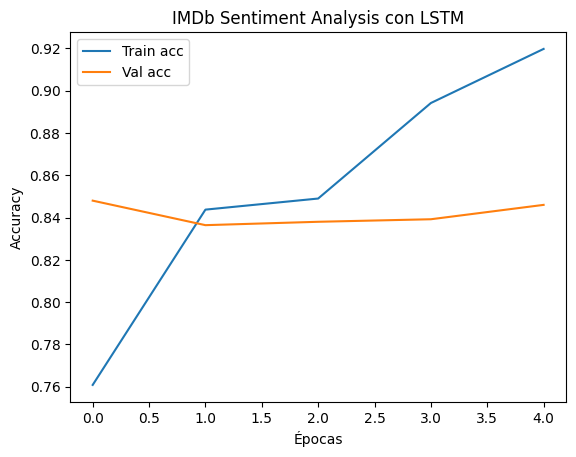

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# -----------------------------
# 1) Cargar dataset IMDb
# -----------------------------
max_features = 10000   # top palabras más frecuentes
max_len = 200          # longitud máxima de cada review

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_features)

# Pad sequences (rellenar o cortar a max_len)
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test  = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

# -----------------------------
# 2) Construir modelo LSTM
# -----------------------------
model = keras.Sequential([
    layers.Embedding(max_features, 128, input_length=max_len),
    layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# -----------------------------
# 3) Entrenar
# -----------------------------
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# -----------------------------
# 4) Evaluar
# -----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"IMDb LSTM - Test loss: {test_loss:.3f} | Test acc: {test_acc:.3f}")

# -----------------------------
# 5) Curva de accuracy
# -----------------------------
plt.plot(history.history['accuracy'], label="Train acc")
plt.plot(history.history['val_accuracy'], label="Val acc")
plt.title("IMDb Sentiment Analysis con LSTM")
plt.xlabel("Épocas")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


El LSTM aprende bien y generaliza de forma estable (~84–85% en validación). La brecha con entrenamiento indica sobreajuste leve; con ajustes menores puede ganar 1–3 pts y mejorar la curva.

Aunque muestre un buen ajuste en entrenamiento, la validación se estanca (~0.84) y el val_loss empezaba a subir, señal de sobreajuste.

Para solucionarlo, se implementan los siguientes cambios:

- BiLSTM (Bidireccional): aprovecha contexto tanto hacia delante como hacia atrás en el texto.
- Regularización (Dropout / SpatialDropout): reduce dependencia de neuronas específicas.
- Callbacks (EarlyStopping y ReduceLROnPlateau): detienen el entrenamiento a tiempo y ajustan la tasa de aprendizaje automáticamente.

Epoch 1/6


c:\Users\anaca\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\layer.py:970: UserWarning: Layer 'global_max_pooling1d_1' (of type GlobalMaxPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 199ms/step - accuracy: 0.5128 - loss: 0.6968 - val_accuracy: 0.5075 - val_loss: 0.6956
Epoch 2/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - accuracy: 0.5908 - loss: 0.6931 - val_accuracy: 0.6681 - val_loss: 0.6894
Epoch 3/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.6775 - loss: 0.6609 - val_accuracy: 0.7331 - val_loss: 0.6048
Epoch 4/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - accuracy: 0.8053 - loss: 0.4945 - val_accuracy: 0.7669 - val_loss: 0.5209
Epoch 5/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - accuracy: 0.8788 - loss: 0.3701 - val_accuracy: 0.8269 - val_loss: 0.4424
Epoch 6/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.9147 - loss: 0.3038 - val_accuracy: 0.8213 - val_loss: 0.4477
BiLSTM (ligera) — Test acc: 0.816 | Test loss: 0.454


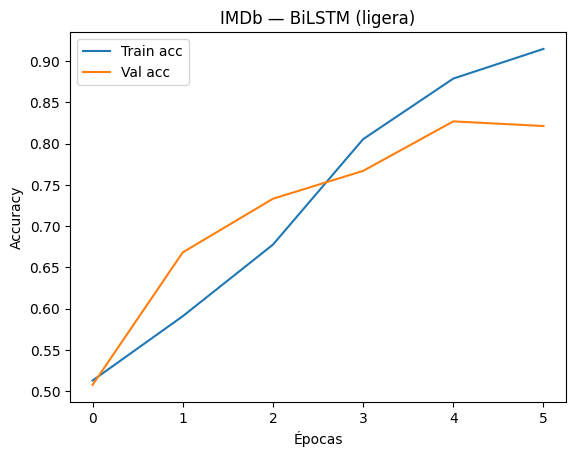

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# 1) Cargar y preparar datos
max_features = 10000   # número máximo de palabras
maxlen = 100           # longitud máxima de secuencia
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Usamos subconjuntos más pequeños para que entrene rápido en CPU
x_train, y_train = x_train[:8000], y_train[:8000]
x_test,  y_test  = x_test[:4000],  y_test[:4000]

# Padding
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test  = sequence.pad_sequences(x_test,  maxlen=maxlen)

# 2) Definir modelo BiLSTM (ligero)
model = models.Sequential([
    layers.Embedding(max_features, 64, input_length=maxlen, mask_zero=True),
    layers.SpatialDropout1D(0.2),
    layers.Bidirectional(
        layers.LSTM(32, return_sequences=True, dropout=0.2)
    ),
    layers.GlobalMaxPooling1D(),
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid"),
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=3e-4),
    loss=losses.BinaryCrossentropy(label_smoothing=0.05),
    metrics=["accuracy"],
)

# 3) Callbacks para parar temprano si no mejora
cbs = [
    EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True),
]

# 4) Entrenar
history = model.fit(
    x_train, y_train,
    epochs=6,
    batch_size=128,
    validation_split=0.2,
    callbacks=cbs,
    verbose=1
)

# 5) Evaluar
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"BiLSTM (ligera) — Test acc: {test_acc:.3f} | Test loss: {test_loss:.3f}")

# 6) Curva de aprendizaje
plt.plot(history.history["accuracy"], label="Train acc")
plt.plot(history.history["val_accuracy"], label="Val acc")
plt.title("IMDb — BiLSTM (ligera)")
plt.xlabel("Épocas"); plt.ylabel("Accuracy"); plt.legend(); plt.show()


El modelo BiLSTM ligero alcanza un 82% de accuracy en test con un loss de 0.45, mostrando un buen equilibrio entre rendimiento y eficiencia computacional. Aunque no llega a los niveles de modelos más complejos (ej. transformers), la red demuestra capacidad para capturar dependencias en texto y generalizar de forma aceptable sin requerir grandes recursos. Esto lo convierte en una solución práctica y replicable en entornos donde el coste de cómputo es una limitación.